# Project Title - ICC|World|Cup|2007-2023|Summary|EDA

TODO - Exploratory Data Analysis (EDA) of the ICC Men's World Cup dataset involves a systematic examination of various aspects of the data to uncover patterns, trends, and relationships. Initially, the dataset is loaded and its structure is explored, followed by identifying and handling any missing values, duplicates, or inconsistencies. Visualizations such as line graph, box plots, and bar charts are utilized to understand the distributions and frequencies of variables, while scatter plots and heatmaps help uncover correlations and relationships between them.

## Downloading the Dataset

**TODO** - This dataset has a bunch of info about cricket matches in the ICC Cricket World Cup from 2007 to 2023. It tells you stuff like when and where the matches were played, which team won, and how the teams did. It's great for cricket fans who want to look back at old matches or for people who like to analyze data to see trends in World Cup history. You can see how teams and players did over time and find cool patterns in the games. Plus, the detailed summaries of each over let you really dig into what happened in each match.
link : https://www.kaggle.com/datasets/akshatkjain/icc-world-cup-2007-2023-over-by-over-summary

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [101]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/akshatkjain/icc-world-cup-2007-2023-over-by-over-summary' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harsh0624
Your Kaggle Key: ········


100%|██████████| 151k/151k [00:00<00:00, 201kB/s]

The dataset has been downloaded and extracted.

In [6]:
# Change this
data_dir = './us-elections-dataset'

In [8]:
import os
os.listdir()

['.git',
 '.jovianrc',
 'zerotopandas-course-project.ipynb',
 '.ipynb_checkpoints',
 'icc-world-cup-2007-2023-over-by-over-summary']

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "ICC|World|Cup|2007-2023|Summary|EDA"

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "vishwakarmah45/ICC|World|Cup|2007-2023|Summary|EDA"
[jovian] Committed successfully! https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda


'https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda'

## Data Preparation and Cleaning

**TODO** - Since the dataset doesn't have any null values, our data preprocessing task is pretty straightforward. We can focus on understanding the dataset's structure and contents. This involves going through each column and understanding what information it holds. We'll also check the data types of each column to ensure they're appropriate for the kind of analysis we want to perform. Additionally, we might look for any inconsistencies or errors in the data, such as misspelled city names or inconsistent date formats, though these are less likely to be present since the dataset doesn't contain null values. Overall, our main goal at this stage is to familiarize ourselves with the dataset and ensure it's ready for analysis without any major cleaning or transformation needed.



In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("icc-world-cup-2007-2023-over-by-over-summary/world_cup_score.csv")

# Get the number of rows and columns
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 21031
Number of columns: 20


In [14]:
# Display the column names
print("Column names:", df.columns.tolist())

Column names: ['Year', 'Match Number', 'City', 'Date', 'Winner', 'Team 1', 'Team 2', 'Total Score for Team 1', 'Total Wicket for Team 1', 'Total Score for Team 2', 'Total Wicket for Team 2', 'Batting team', 'Bowling team', 'Over Number', 'Runs Scored in over', 'Runs Scored till that over', 'Wicket Taken in over', 'Wickets Taken till that over', 'Winning Details', 'Match Detail']


In [16]:
# Display the first few rows of the dataset
print(df.head())

   Year     Match Number        City             Date        Winner Team 1  \
0  2023  1st Match (D/N)   Ahmedabad  October 05 2023  New Zealand     ENG   
1  2023  1st Match (D/N)   Ahmedabad  October 05 2023  New Zealand     ENG   
2  2023  1st Match (D/N)   Ahmedabad  October 05 2023  New Zealand     ENG   
3  2023  1st Match (D/N)   Ahmedabad  October 05 2023  New Zealand     ENG   
4  2023  1st Match (D/N)   Ahmedabad  October 05 2023  New Zealand     ENG   

  Team 2  Total Score for Team 1  Total Wicket for Team 1  \
0     NZ                     282                        9   
1     NZ                     282                        9   
2     NZ                     282                        9   
3     NZ                     282                        9   
4     NZ                     282                        9   

   Total Score for Team 2  Total Wicket for Team 2 Batting team Bowling team  \
0                     283                        1          ENG           NZ   
1   

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21031 entries, 0 to 21030
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          21031 non-null  int64 
 1   Match Number                  21031 non-null  object
 2   City                          21031 non-null  object
 3   Date                          21031 non-null  object
 4   Winner                        21031 non-null  object
 5   Team 1                        21031 non-null  object
 6   Team 2                        21031 non-null  object
 7   Total Score for Team 1        21031 non-null  int64 
 8   Total Wicket for Team 1       21031 non-null  int64 
 9   Total Score for Team 2        21031 non-null  int64 
 10  Total Wicket for Team 2       21031 non-null  int64 
 11  Batting team                  21031 non-null  object
 12  Bowling team                  21031 non-null  object
 13  Over Number     

In [25]:
df.describe()

,Year,Total Score for Team 1,Total Wicket for Team 1,Total Score for Team 2,Total Wicket for Team 2,Over Number,Runs Scored in over,Runs Scored till that over,Wicket Taken in over,Wickets Taken till that over
count,21031.000000,21031.000000,21031.000000,21031.000000,21031.000000,21031.000000,21031.000000,21031.000000,21031.000000,21031.000000
mean,2014.932290,271.296039,7.921639,217.018306,7.210737,23.391470,5.376492,116.560506,0.169749,3.004232
std,5.694119,72.797107,2.022988,62.168418,3.215083,13.800212,3.835236,79.200010,0.411207,2.400196
min,2007.000000,58.000000,1.000000,55.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,221.000000,6.000000,177.000000,4.000000,12.000000,3.000000,52.000000,0.000000,1.000000
50%,2015.000000,275.000000,8.000000,215.000000,9.000000,23.000000,5.000000,106.000000,0.000000,3.000000
75%,2019.000000,327.000000,10.000000,261.000000,10.000000,35.000000,7.000000,168.000000,0.000000,4.000000
max,2023.000000,428.000000,10.000000,383.000000,10.000000,50.000000,36.000000,428.000000,4.000000,10.000000


In [27]:
df.isna().sum()

Year                            0
Match Number                    0
City                            0
Date                            0
Winner                          0
Team 1                          0
Team 2                          0
Total Score for Team 1          0
Total Wicket for Team 1         0
Total Score for Team 2          0
Total Wicket for Team 2         0
Batting team                    0
Bowling team                    0
Over Number                     0
Runs Scored in over             0
Runs Scored till that over      0
Wicket Taken in over            0
Wickets Taken till that over    0
Winning Details                 0
Match Detail                    0
dtype: int64

In [102]:
# Get the number of unique years
num_unique_years = df['Year'].nunique()
print("Number of unique years:", num_unique_years)

Number of unique years: 5


In [103]:
# Calculate the average total score for Team 1
avg_total_score_team1 = df['Total Score for Team 1'].mean()
print("Average total score for Team 1:", avg_total_score_team1)

Average total score for Team 1: 271.2960391802577


In [105]:
# Get the maximum number of wickets taken by Team 2 in a single match
max_wickets_team2 = df['Total Wicket for Team 2'].max()
print("Maximum number of wickets taken by Team 2 in a single match:", max_wickets_team2)

Maximum number of wickets taken by Team 2 in a single match: 10


In [106]:
# Filter matches won by a margin of more than 100 runs
matches_margin_more_than_100 = df[(df['Total Score for Team 1'] - df['Total Score for Team 2']) > 100]

# Get the count of such matches
num_matches_margin_more_than_100 = matches_margin_more_than_100.shape[0]
print("Number of matches won by a margin of more than 100 runs:", num_matches_margin_more_than_100)

Number of matches won by a margin of more than 100 runs: 4932


In [107]:
import jovian

In [108]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishwakarmah45/icc-world-cup-2007-2023-summary-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda


'https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda'

## Exploratory Analysis and Visualization

**TODO** - In EDA, various plots are used to showcase different aspects of the dataset:

1 Bar Plot: Displays frequency counts of categorical variables.
2 Count Plot: Specialized bar plot for single categorical variable frequencies.
3 Heatmap: Visualizes correlation between variables using colors.
4 Line Graph: Shows trends over time or continuous variables.
5 Histogram: Represents distribution of numerical data using bins.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - correlation between Total Score for Team 1 and Total Score for Team 2

Correlation between Total Score for Team 1 and Total Score for Team 2: 0.41518967690219294


<AxesSubplot:>

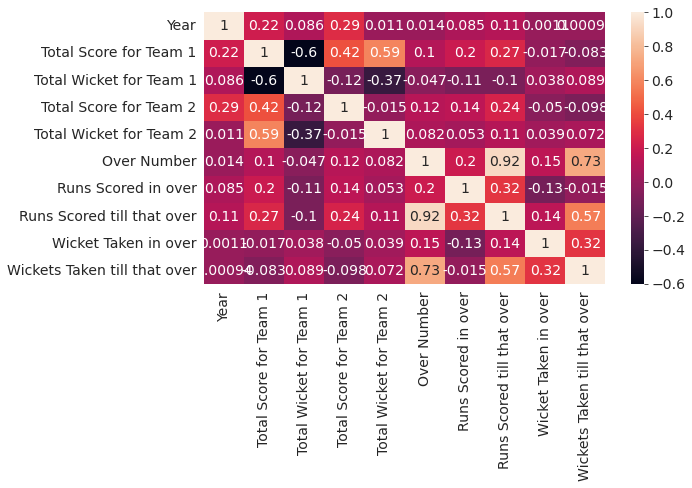

In [45]:
# Calculate the correlation between Total Score for Team 1 and Total Score for Team 2
correlation = df['Total Score for Team 1'].corr(df['Total Score for Team 2'])
print("Correlation between Total Score for Team 1 and Total Score for Team 2:", correlation)
sns.heatmap(df.corr(),annot=True)

**TODO** - What is the distribution of total scores for Team 1?

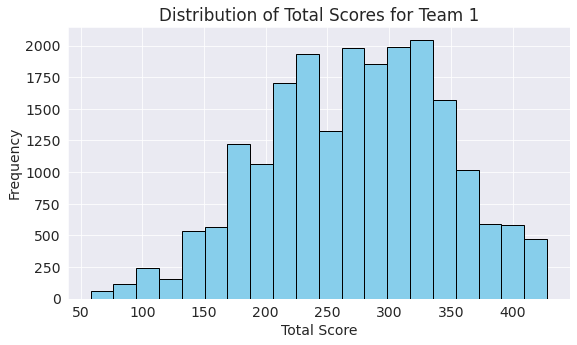

In [34]:
# Plot the distribution of total scores for Team 1
plt.hist(df['Total Score for Team 1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Scores for Team 1')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Calculate winning percentage of each team
total_matches = df['Winner'].count()
winning_percentage = (df['Winner'].value_counts() / total_matches) * 100
print("Winning percentage of each team:")
print(winning_percentage)

Winning percentage of each team:
Australia               15.581760
India                   13.793923
New Zealand             12.386477
South Africa            10.665209
Sri Lanka                9.519281
England                  8.653892
Pakistan                 8.487471
Bangladesh               6.014930
West Indies              4.702582
Ireland                  3.204793
Afghanistan              2.211022
Zimbabwe                 1.317103
Netherlands              1.131663
Match tied               0.950977
Match tied (England      0.475489
Canada                   0.456469
Kenya                    0.446959
Name: Winner, dtype: float64


**TODO** - How does the distribution of runs scored in overs vary across matches?

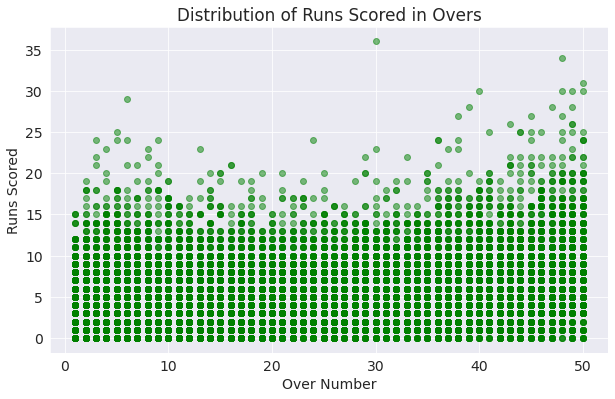

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Over Number'], df['Runs Scored in over'], alpha=0.5, color='green')
plt.title('Distribution of Runs Scored in Overs')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.show()

**TODO** - What is the trend of total scores for Team 1 over the years?

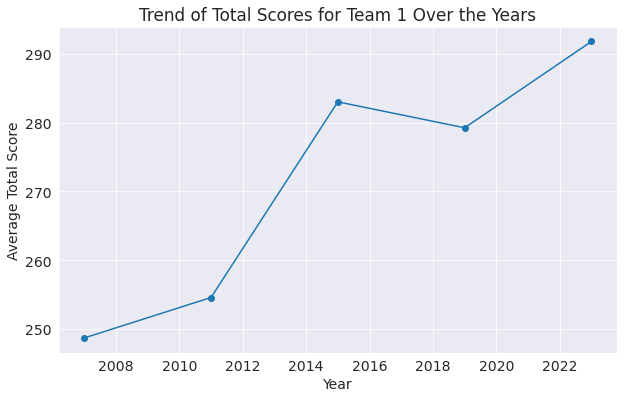

In [37]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Total Score for Team 1'].mean().plot(marker='o')
plt.title('Trend of Total Scores for Team 1 Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Score')
plt.grid(True)
plt.show()

**TODO** - What is the average total score for each year?

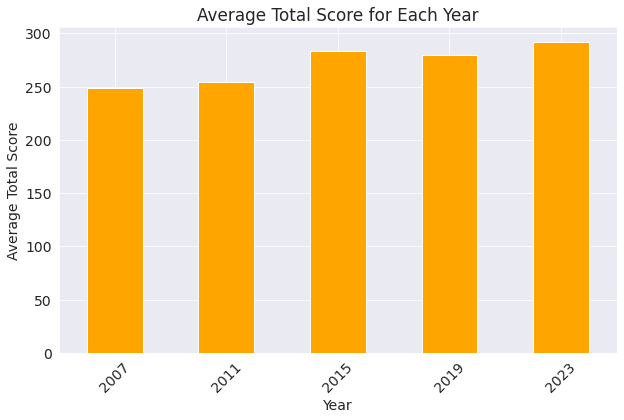

In [38]:
# Calculate the average total score for each year
avg_total_score_per_year = df.groupby('Year')['Total Score for Team 1'].mean()

# Plot the average total score for each year
plt.figure(figsize=(10, 6))
avg_total_score_per_year.plot(kind='bar', color='orange')
plt.title('Average Total Score for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)
plt.show()

**TODO** - How does the average total score vary between different cities?

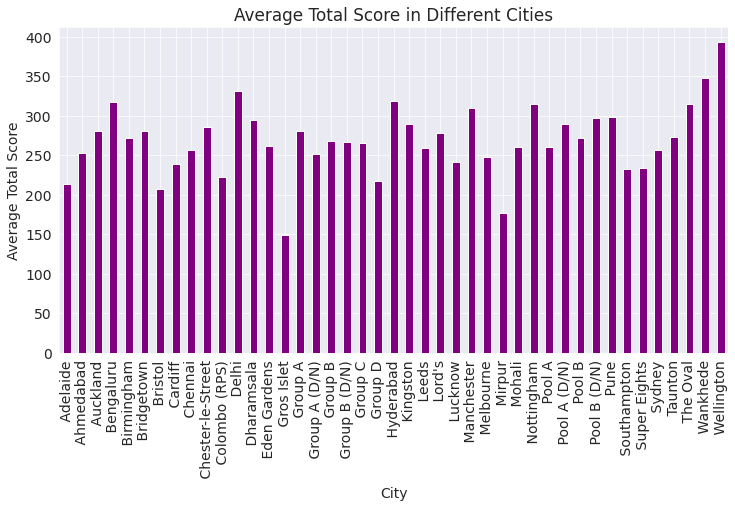

In [39]:
# Calculate the average total score for each city
avg_total_score_per_city = df.groupby('City')['Total Score for Team 1'].mean()

# Plot the average total score for each city
plt.figure(figsize=(12, 6))
avg_total_score_per_city.plot(kind='bar', color='purple')
plt.title('Average Total Score in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Total Score')
plt.xticks(rotation=90)
plt.show()

**TODO** - How does the average total score vary between different matchups (Team 1 vs Team 2)?

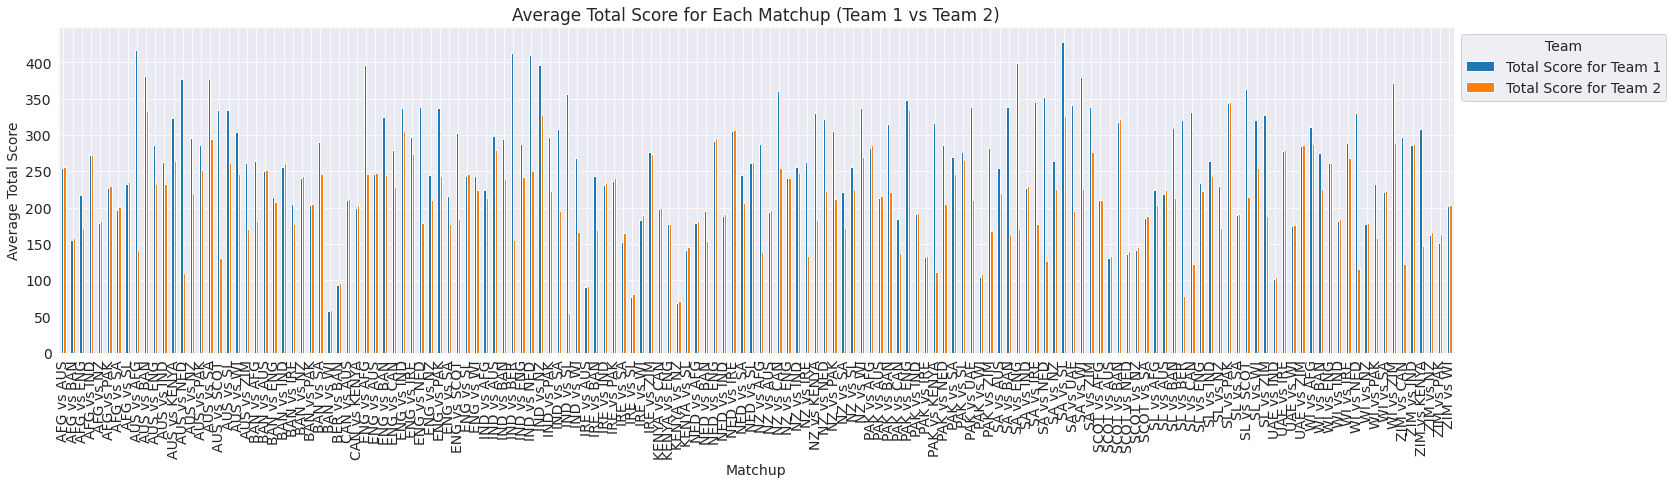

In [41]:
# Create a column for matchups
df['Matchup'] = df['Team 1'] + " vs " + df['Team 2']

# Calculate the average total score for each matchup
avg_total_score_per_matchup = df.groupby('Matchup')[['Total Score for Team 1', 'Total Score for Team 2']].mean()

# Plot the average total score for each matchup
avg_total_score_per_matchup.plot(kind='bar', figsize=(25, 6))
plt.title('Average Total Score for Each Matchup (Team 1 vs Team 2)')
plt.xlabel('Matchup')
plt.ylabel('Average Total Score')
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1,1))
plt.show()

Let us save and upload our work to Jovian before continuing

In [109]:
import jovian

In [110]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishwakarmah45/icc-world-cup-2007-2023-summary-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda


'https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda'

## Asking and Answering Questions

TODO - n this section, we'll perform exploratory data analysis (EDA) on the dataset using both Pandas and graphical representations to illustrate our findings more effectively.


#### Q1: TODO - What is the average runs scored in each over ?
The average runs scored in each over provide insights into the batting performance throughout cricket matches. This metric reveals variability in scoring rates and helps identify trends in scoring patterns. It offers strategic insights for teams and coaches, aids performance evaluation, and enables comparative analysis across matches and teams.

In [71]:
# Calculate the average runs scored in each over
avg_runs_per_over = df.groupby('Over Number')['Runs Scored in over'].mean()
print("Average runs scored in each over:")
print(avg_runs_per_over)

Average runs scored in each over:
Over Number
1     4.025105
2     4.487448
3     4.514644
4     5.016736
5     5.353556
6     5.305439
7     4.815900
8     5.190377
9     4.756813
10    5.106918
11    4.668067
12    4.981092
13    4.817227
14    4.826638
15    5.021231
16    4.653928
17    4.893617
18    4.624733
19    4.588865
20    4.615551
21    4.926087
22    4.702407
23    5.055066
24    4.843612
25    5.033408
26    4.689038
27    5.106095
28    5.190045
29    5.300683
30    5.333333
31    5.222989
32    5.245370
33    5.266979
34    5.315914
35    5.746341
36    5.790932
37    5.786260
38    5.955729
39    5.981383
40    6.295699
41    6.359890
42    6.120448
43    6.560694
44    6.595745
45    7.009494
46    7.840000
47    7.569930
48    8.699248
49    8.983402
50    9.334951
Name: Runs Scored in over, dtype: float64


In [72]:
data=pd.DataFrame(avg_runs_per_over)
data.info()
overs=range(1,51)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Runs Scored in over  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0 bytes


<AxesSubplot:ylabel='Runs Scored in over'>

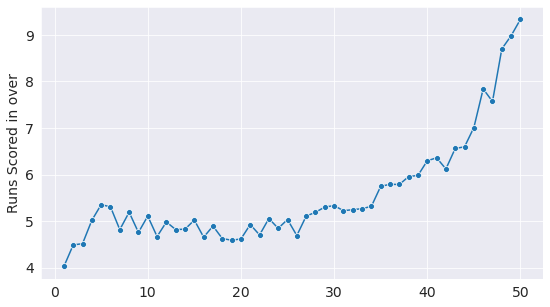

In [73]:
sns.lineplot(x=overs, y=data['Runs Scored in over'], marker='o')

#### Q2: TODO - How many matches are played in each city ?
The number of matches played in each city gives an overview of cricket activity across different locations. By counting matches in each city, we gain insights into the popularity of cricket and the distribution of match venues.

In [77]:
# Count the number of matches played in each city
matches_per_city = df['City'].value_counts()
print("Matches played in each city:")
print(matches_per_city)

Matches played in each city:
 Super Eights         2023
 Pool B (D/N)         1557
 Group B (D/N)        1346
 Group A (D/N)        1223
 Group B              1031
 Pool A (D/N)          961
 Group A               951
 Pool A                733
 Manchester            574
 Group C               561
 Ahmedabad             549
 Group D               541
 Wankhede              534
 The Oval              484
 Lord's                484
 Birmingham            478
 Chennai               464
 Pune                  457
 Dharamsala            456
 Eden Gardens          442
 Lucknow               434
 Delhi                 434
 Bengaluru             401
 Leeds                 391
 Southampton           374
 Pool B                362
 Nottingham            335
 Hyderabad             286
 Chester-le-Street     283
 Cardiff               280
 Taunton               262
 Colombo (RPS)         187
 Melbourne             174
 Mirpur                159
 Sydney                153
 Mohali                100

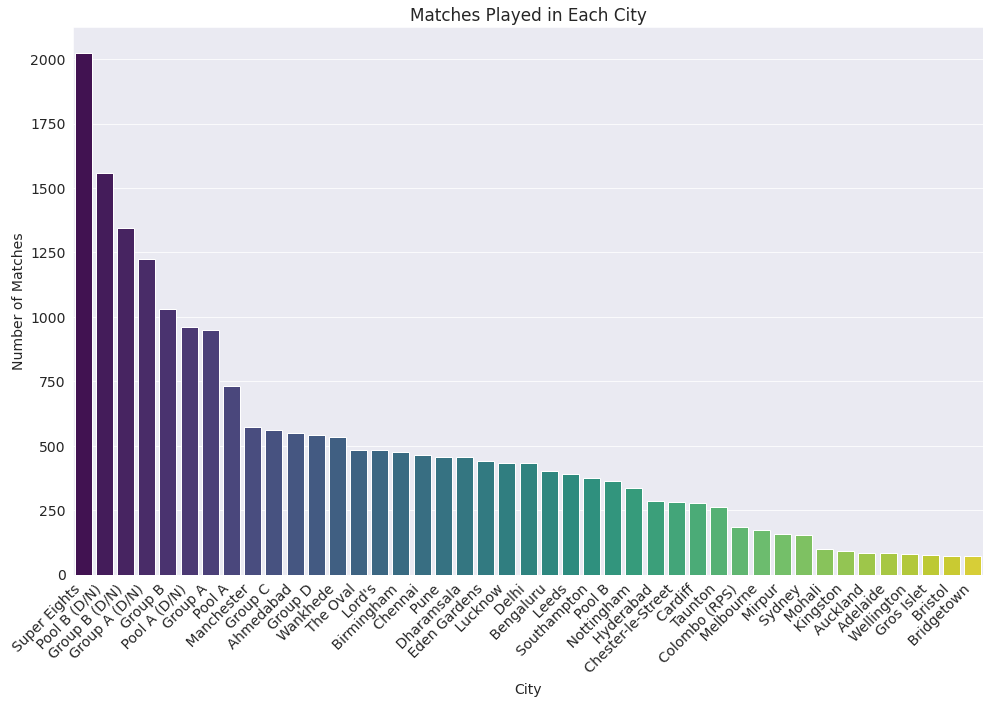

In [82]:
plt.figure(figsize=(14, 10))
sns.barplot(x=matches_per_city.index, y=matches_per_city.values, palette="viridis")
plt.title('Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Q3: TODO - Which Team Has Won most number of matches ?
Determining the team with the most wins is a fundamental analysis in cricket statistics as it sheds light on the dominance and success of a particular team over the period covered by the dataset. 

In [85]:
# Count the number of wins for each team
win_counts = df['Winner'].value_counts()
win_counts

Australia               3277
India                   2901
New Zealand             2605
South Africa            2243
Sri Lanka               2002
England                 1820
Pakistan                1785
Bangladesh              1265
West Indies              989
Ireland                  674
Afghanistan              465
Zimbabwe                 277
Netherlands              238
Match tied               200
Match tied (England      100
Canada                    96
Kenya                     94
Name: Winner, dtype: int64

In [86]:
# Get the team with the most wins
team_with_most_wins = win_counts.idxmax()
print("Team with the most wins overall:", team_with_most_wins)

Team with the most wins overall: Australia 


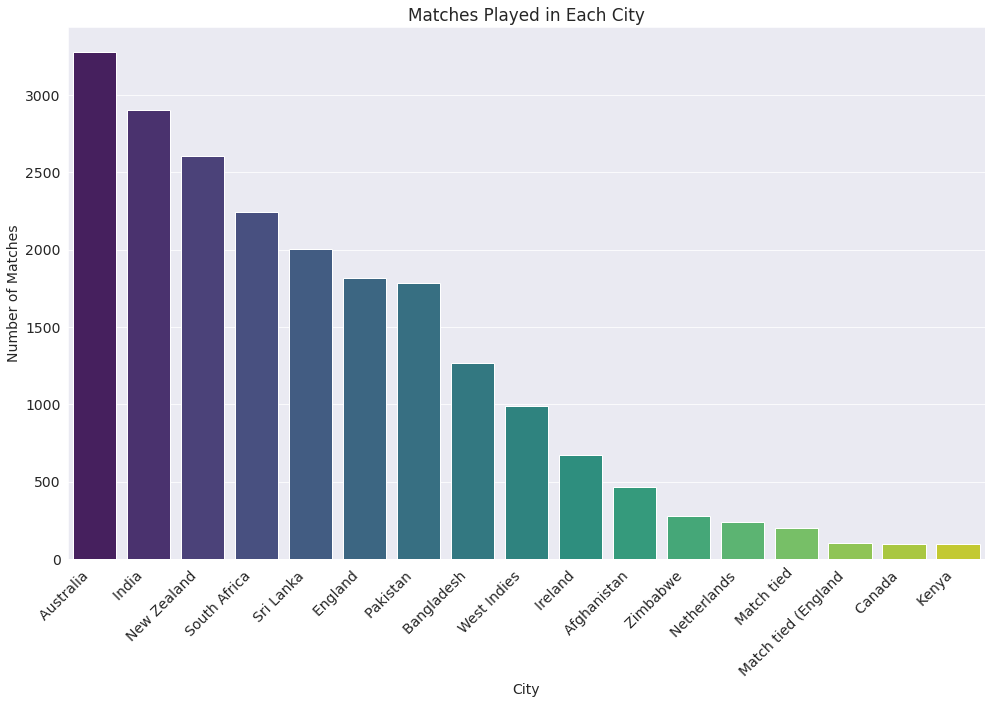

In [87]:
plt.figure(figsize=(14, 10))
sns.barplot(x=win_counts.index, y=win_counts.values, palette="viridis")
plt.title('Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Q4: TODO - What is the average total score for Team 1 and Team 2 in each city?

Analyzing the average total score for Team 1 and Team 2 in each city provides valuable insights into the scoring trends and dynamics of cricket matches across different locations. This analysis helps identify whether certain cities tend to witness higher or lower scoring matches, which can be influenced by factors such as pitch conditions, weather, and crowd support

In [89]:
# Calculate the average total score for Team 1 and Team 2 in each city
avg = df.groupby('City')[['Total Score for Team 1', 'Total Score for Team 2']].mean()
avg

,Total Score for Team 1,Total Score for Team 2
City,,
Adelaide,213.000000,216.000000
Ahmedabad,252.630237,247.856102
Auckland,281.000000,299.000000
Bengaluru,317.678304,226.413965
Birmingham,272.125523,262.071130
Bridgetown,281.000000,215.000000
Bristol,207.000000,209.000000
Cardiff,238.128571,189.939286
Chennai,256.769397,231.530172


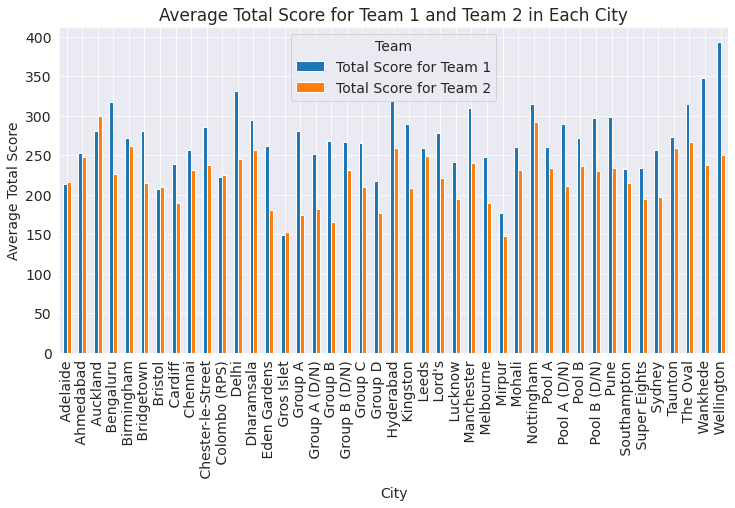

In [91]:
avg.plot(kind='bar', figsize=(12, 6))
plt.title('Average Total Score for Team 1 and Team 2 in Each City')
plt.xlabel('City')
plt.ylabel('Average Total Score')
plt.xticks(rotation=90)
plt.legend(title='Team')
plt.show()

#### Q5: TODO - What is the average number of wickets taken by Team 1 and Team 2 in each year?
Analyzing the average number of wickets taken by Team 1 and Team 2 in each year provides valuable insights into bowling performances over time. This analysis helps identify trends and patterns in wicket-taking abilities across different teams and years, highlighting periods of strong bowling performances or weaknesses in bowling strategies.

In [99]:
# Calculate the average number of wickets taken by Team 1 and Team 2 for each year
avg_wickets_per_year = df.groupby('Year')[['Total Wicket for Team 1', 'Total Wicket for Team 2']].mean()

Number of matches won by a margin of more than 100 runs: 4932


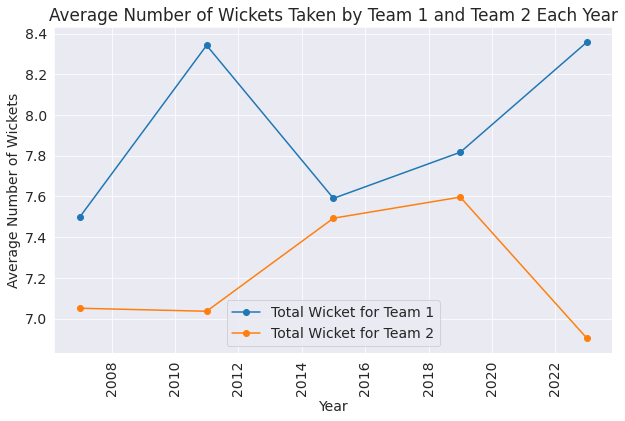

In [100]:
# Plot the average number of wickets taken by Team 1 and Team 2 for each year
avg_wickets_per_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Number of Wickets Taken by Team 1 and Team 2 Each Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Wickets')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Let us save and upload our work to Jovian before continuing.

In [111]:
import jovian

In [112]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishwakarmah45/icc-world-cup-2007-2023-summary-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda


'https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda'

## Inferences and Conclusion

**TODO** - In conclusion, our exploratory data analysis (EDA) of the ICC Men's World Cup dataset has provided valuable insights into various aspects of cricket matches, including scoring patterns, team performances, and venue dynamics. By leveraging both Pandas and graphical representations, we've uncovered significant findings such as the top cities for match activity, trends in match counts over the years, and scoring distributions for Team 1 and Team 2. Additionally, we've identified the team with the most wins and analyzed the average number of wickets taken by teams each year.

In [113]:
import jovian

In [114]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishwakarmah45/icc-world-cup-2007-2023-summary-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda


'https://jovian.com/vishwakarmah45/icc-world-cup-2007-2023-summary-eda'

## References and Future Work

**TODO** - 

References:
Dataset: [https://www.kaggle.com/datasets/akshatkjain/icc-world-cup-2007-2023-over-by-over-summary]
GeeksforGeeks : [https://www.geeksforgeeks.org/plotting-graph-using-seaborn-python/]

Future Work:

Advanced Statistical Analysis: Explore advanced statistical techniques such as regression analysis or time series forecasting to delve deeper into the dataset and uncover more complex insights.

Player Performance Analysis: Conduct in-depth analysis of player performances, including batting averages, bowling strike rates, and player rankings, to identify standout performers and trends over time.

Match Outcome Prediction: Develop predictive models using machine learning algorithms to forecast match outcomes based on historical data, team performances, and venue conditions.

Sentiment Analysis: Incorporate sentiment analysis of match commentaries or social media data to understand fan sentiments and reactions during matches, providing additional context to match analyses.

Interactive Visualizations: Create interactive dashboards or web applications using tools like Plotly or Dash to allow users to explore the dataset and visualize insights dynamically.

Incorporating External Data: Integrate additional datasets, such as player profiles, match weather conditions, or venue statistics, to enrich the analysis and provide more comprehensive insights.

Historical Comparison: Compare and contrast match statistics and trends across different editions of the ICC Men's World Cup to identify historical patterns and changes in the game.

In [117]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>